In [292]:
using AutomotiveSimulator
using AutomotiveVisualization
using EzXML

In [293]:
# using AutoUrban
include("../src/roadway/interaction_roadway.jl")
include("../src/roadway/roadway_generation.jl")
include("../src/roadway/roadway_perception.jl")
include("../src/roadway/roadway_intersection.jl")
include("../src/roadway/convert2xodr.jl")

convert_roadway! (generic function with 1 method)

In [566]:
using Polynomials
using LinearAlgebra
using DelimitedFiles

## Build Whole Roadway

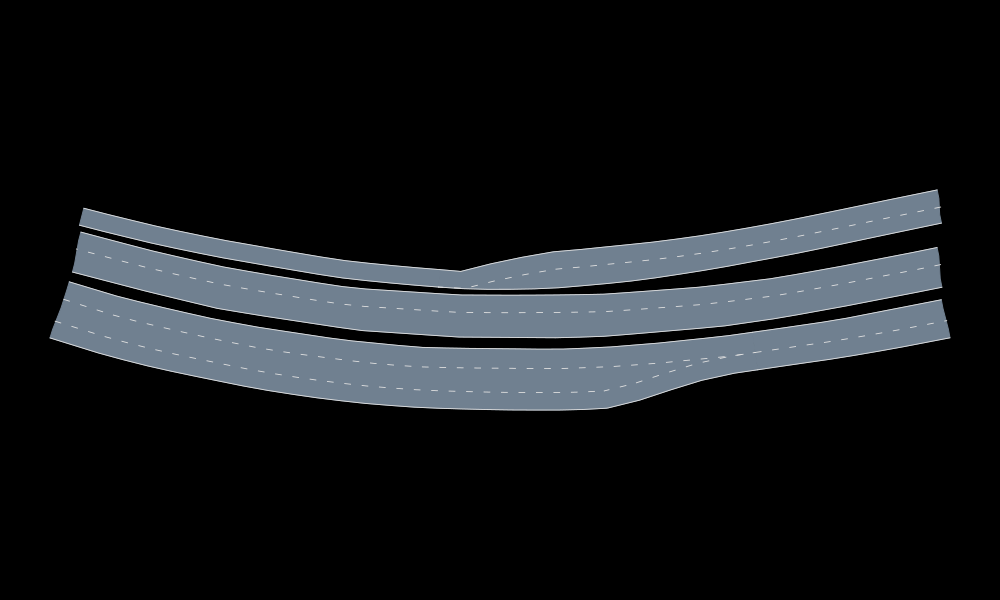

In [9]:
road = make_roadway_interaction()
render([road])

In [10]:
#Initialze
doc,r = initialize_XML()
#Convert roadway and ignoring any junctions
convert_roadway!(r,road)
prettyprint(doc)


<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="83.01973989265717" junction="-1">
    <type s="0" type="rural"/>
    <link><successor elementType="road" elementId="2" contactPoint="start"/></link>
    <planView>
      <geometry s="0.0" x="1146.2697439050535" y="973.136231976754" hdg="3.343587454215944" length="83.01973989265717">
        <arc curvature="1.82184514383744e-7"/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="4.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"><roadMark sOffset="0.0" type="solid" weight="standard" color="standard" width="0.5" laneChange="both"/></lane>
        </center>
        <right>
          <lane id="-2" type="driving" level="false">
            <width sOffset="0" a="3.0"

In [94]:
write("interaction.xodr",doc)


5470

## Build Sections 1

In [569]:
function make_roadway_interaction_partial()
    road = Roadway()
        # Make segment 1: the on ramp a and first part of lane: b1
    track_a = centerlines_txt2tracks(joinpath(@__DIR__,"../dataset/modified_centerlines_/centerlines_a.txt")); # Top most on ramp
    lane_a = Lane(LaneTag(1,1),track_a)

    track_b1 = centerlines_txt2tracks(joinpath(@__DIR__,"../dataset/modified_centerlines_/centerlines_b1.txt")); # Top most on ramp
    lane_b1 = Lane(LaneTag(1,2),track_b1)

        # Make segment 2: second part of lane: b2. And connect both lanes of segment 1 into segment 2
    track_b2 = centerlines_txt2tracks(joinpath(@__DIR__,"../dataset/modified_centerlines_/centerlines_b2.txt"))
    lane_b2 = Lane(LaneTag(2,1),track_b2)
#     connect!(lane_a,lane_b2)
#     connect!(lane_b1,lane_b2)

    push!(road.segments,RoadSegment(1,[lane_a, lane_b1]));  print("lane a\n");
    push!(road.segments,RoadSegment(2,[lane_b2]));  print("lane b2\n");
    return road
end


make_roadway_interaction_partial (generic function with 1 method)

lane a
lane b2


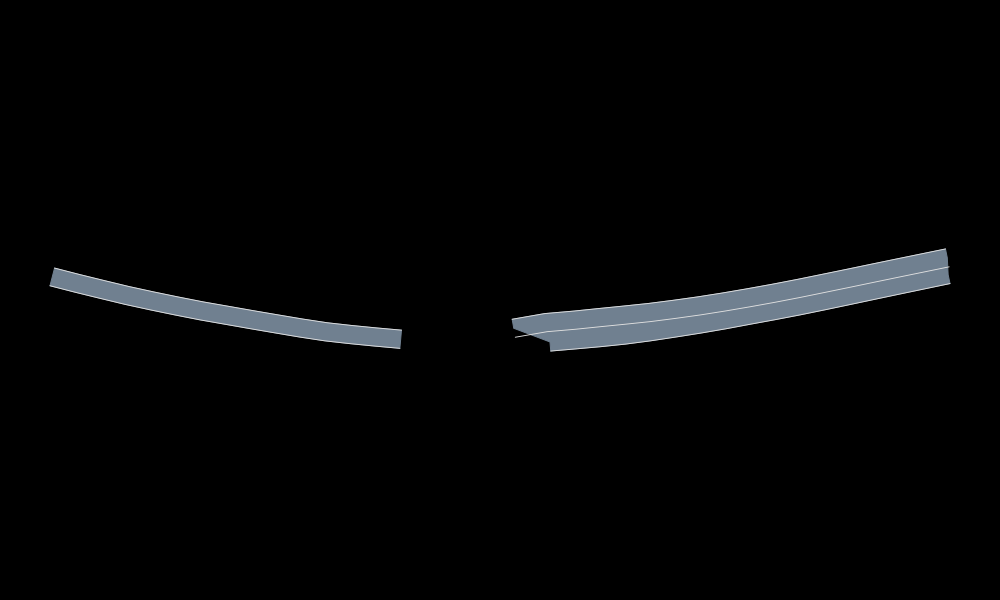

In [570]:
road_partial = make_roadway_interaction_partial()
render([road_partial])


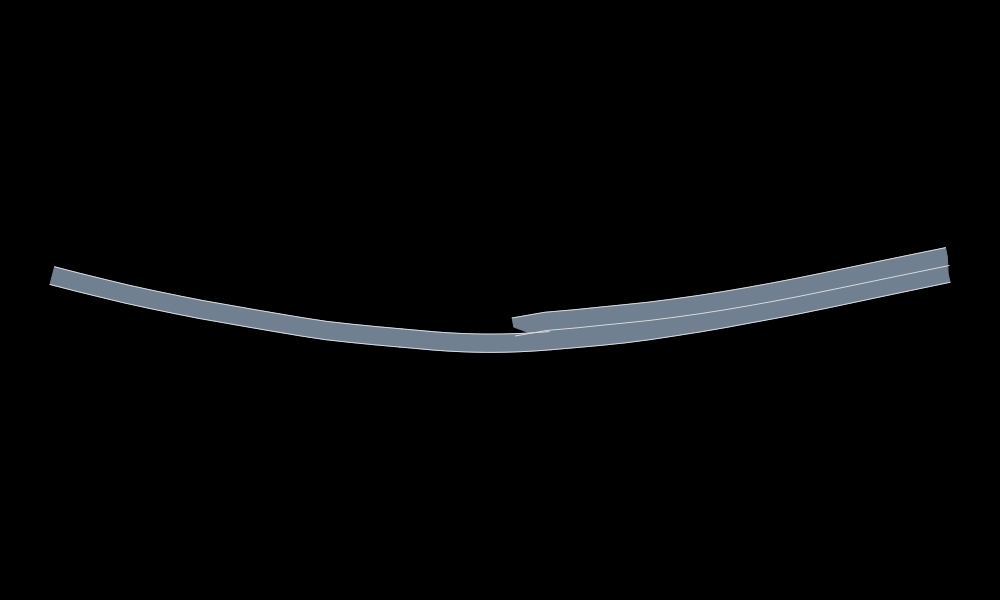

In [571]:
# junctions=[Junction([Connection(1,2,0,[(2,1)]), Connection(1,2,0,[(1,1)])])] #,Connection(1,3),Connection(1,4)])]
junctions=[Junction([Connection(1,2,0,[(2,1)])])]

for junction in junctions
    add_junction!(junction, road_partial)
end
render([road_partial])

In [523]:
include("../src/roadway/convert2xodr.jl")

convert_roadway! (generic function with 1 method)

In [572]:
doc,r = initialize_XML()
convert_roadway!(r,road_partial)
handle_junctions(r,junctions,road_partial)
prettyprint(doc)



seg1 planView : paramPoly3
seg2 planView : paramPoly3
seg3 planView : paramPoly3
seg4 planView : line<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="72.32789780265584" junction="-1">
    <type s="0" type="rural"/>
    <link></link>
    <planView>
      <geometry s="0.0" x="1146.2697439050535" y="973.136231976754" hdg="3.343587454215944" length="72.32789780265584">
        <paramPoly3 aU="-0.22299137799930513" bU="75.17395792107598" cU="-13.057217751566498" dU="9.491328749832206" aV="-0.09516689502849558" bV="1.3096599083694467" cV="-1.9396332299931487" dV="-2.560152643743831" pRange="[0, 1]"/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="4.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"><roadMark sOff

In [573]:
write("interaction_ab1b2_paramPoly3_junction_b1b2.xodr",doc)


4701

## Build Sections 2

In [516]:
function make_roadway_interaction_partial()
    road = Roadway()
    track_a = centerlines_txt2tracks(joinpath(@__DIR__,"../dataset/centerlines_a.txt")); # Top most on ramp
    lane_a = Lane(LaneTag(1,1),track_a) #,boundary_left=LaneBoundary(:broken,:white))

    track_b1 = centerlines_txt2tracks(joinpath(@__DIR__,"../dataset/centerlines_b1.txt")); # Top most on ramp
    lane_b1 = Lane(LaneTag(1,2),track_b1)

    track_b2 = centerlines_txt2tracks(joinpath(@__DIR__,"../dataset/centerlines_b2.txt"))
    lane_b2 = Lane(LaneTag(2,1),track_b2)
    connect!(lane_a,lane_b2)
    connect!(lane_b1,lane_b2)

    push!(road.segments,RoadSegment(1,[lane_a, lane_b1]));
    push!(road.segments,RoadSegment(2,[lane_b2]));
    return road
end


make_roadway_interaction_partial (generic function with 1 method)

(2,)


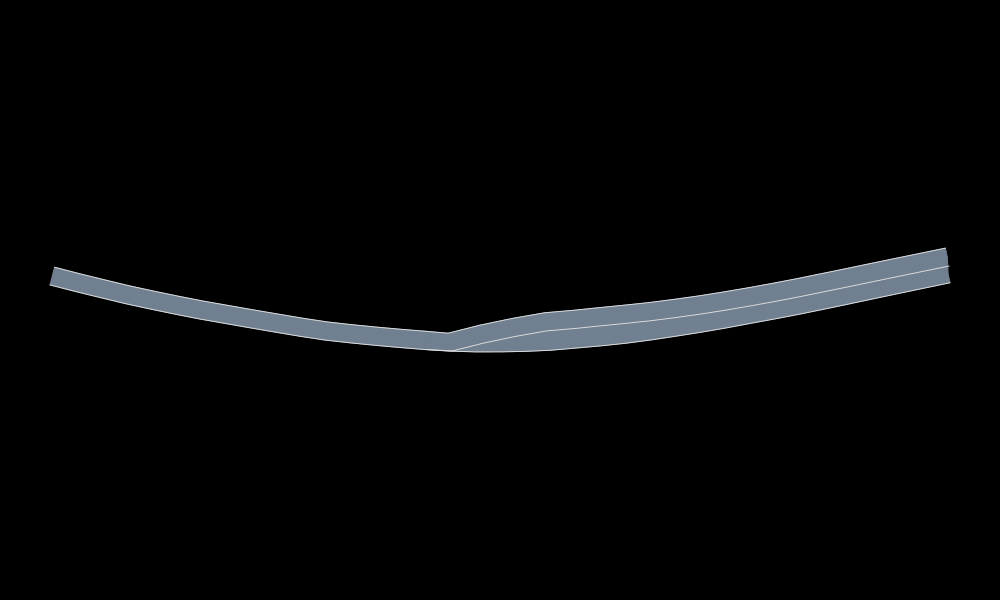

In [517]:
road_partial = make_roadway_interaction_partial()
print(size(road_partial.segments), "\n")

render([road_partial])

In [469]:
# print(seg.id, "\n")
# lane = seg.lanes[1] #seg.lanes[2]
# print(lane.curve)

# doc,r = initialize_XML()
# seg = road_partial.segments[1]
# convert_seg!(seg,r,road_partial)


1


380-element Array{CurvePt{Float64},1}:
 CurvePt({1146.270, 973.136, -2.940}, 0.000, 0.000, NaN)
 CurvePt({1146.236, 973.129, -2.940}, 0.035, 0.000, NaN)
 CurvePt({1146.141, 973.110, -2.940}, 0.131, 0.000, NaN)
 CurvePt({1145.994, 973.080, -2.940}, 0.282, 0.000, NaN)
 CurvePt({1145.800, 973.040, -2.940}, 0.479, 0.000, NaN)
 CurvePt({1145.567, 972.992, -2.940}, 0.717, 0.000, NaN)
 CurvePt({1145.303, 972.938, -2.940}, 0.987, 0.000, NaN)
 CurvePt({1145.013, 972.879, -2.940}, 1.282, 0.000, NaN)
 CurvePt({1144.706, 972.816, -2.940}, 1.596, 0.000, NaN)
 CurvePt({1144.388, 972.751, -2.940}, 1.920, 0.000, NaN)
 CurvePt({1144.067, 972.685, -2.940}, 2.248, -0.000, NaN)
 CurvePt({1143.749, 972.620, -2.940}, 2.573, -0.000, NaN)
 CurvePt({1143.442, 972.557, -2.940}, 2.886, -0.000, NaN)
 ⋮
 CurvePt({1067.685, 959.956, -2.894}, 79.757, -0.000, NaN)
 CurvePt({1067.287, 959.855, -2.894}, 80.169, -0.000, NaN)
 CurvePt({1066.883, 959.753, -2.894}, 80.585, 0.000, NaN)
 CurvePt({1066.484, 959.652, -2.894}, 

In [505]:
include("../src/roadway/convert2xodr.jl")

convert_roadway! (generic function with 1 method)

In [518]:
doc,r = initialize_XML()
convert_roadway!(r,road_partial)
prettyprint(doc)



seg1 planView : paramPoly3
seg2 planView : paramPoly3<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="83.01973989265717" junction="-1">
    <type s="0" type="rural"/>
    <link><successor elementType="road" elementId="2" contactPoint="start"/></link>
    <planView>
      <geometry s="0.0" x="1146.2697439050535" y="973.136231976754" hdg="3.343587454215944" length="83.01973989265717">
        <paramPoly3 aU="-0.5116190580056075" bU="88.66109490673576" cU="-30.995462360204584" dU="25.344738574843802" aV="-0.3187776742483013" bV="5.026540639093648" cV="-13.701958001053356" dV="5.670842644747437" pRange="[0, 1]"/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="4.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="0" type="driving" level="false"

In [494]:
# write("interaction_a_paramPoly3.xodr",doc)
write("interaction_b2_paramPoly3.xodr",doc)


1184

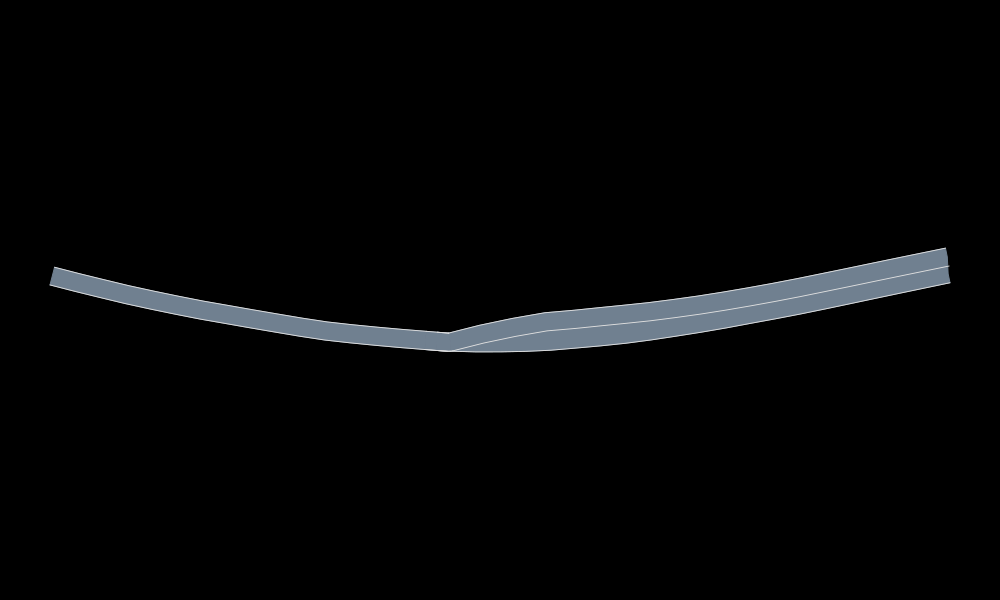

In [519]:
# junctions = [Junction([Connection(1,2)])]
junctions=[Junction([Connection(1,2,0,[(1,1),(2,1)])])] #,Connection(1,3),Connection(1,4)])]

for junction in junctions
    add_junction!(junction, road_partial)
end
render([road_partial])


In [511]:
doc,r = initialize_XML()
convert_roadway!(r,road_partial)
handle_junctions(r,junctions,road_partial)
prettyprint(doc)



seg1 planView : paramPoly3
seg2 planView : paramPoly3
seg3 planView : paramPoly3
seg4 planView : line<?xml version="1.0" encoding="UTF-8"?>
<OpenDRIVE>
  <header revMajor="1" revMinor="4" name="" version="1.00" data="Tue Mar 21 15:00:43 2017" north="0" south="0" east="0" west="0"></header>
  <road name="" id="1" length="83.01973989265717" junction="-1">
    <type s="0" type="rural"/>
    <link><successor elementType="junction" elementId="1"/></link>
    <planView>
      <geometry s="0.0" x="1146.2697439050535" y="973.136231976754" hdg="3.343587454215944" length="83.01973989265717">
        <paramPoly3 aU="-0.5116190580056075" bU="88.66109490673576" cU="-30.995462360204584" dU="25.344738574843802" aV="-0.3187776742483013" bV="5.026540639093648" cV="-13.701958001053356" dV="5.670842644747437" pRange="[0, 1]"/>
      </geometry>
    </planView>
    <lanes>
      <laneOffset s="0.0" a="4.5" b="0" c="0" d="0"/>
      <laneSection s="0">
        <left/>
        <center>
          <lane id="

In [512]:
write("interaction_ab1b2_paramPoly3_connect.xodr",doc)


5285